# Predictive Analysis

Two Predictive Analysis will be done 
1. Rating Prediction
2. Cost Prediction

### Models used - Linear Regression, Decision Tree, Random Forest, Extra Tree

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('ZOMATO_INDIA.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [4]:
df['establishment']=encoder.fit_transform(df['establishment'])

In [5]:
df['type_of_meal']=encoder.fit_transform(df['type_of_meal'])
df['delivery']=encoder.fit_transform(df['delivery'])

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Rating prediction using Random Forest, Logistic Regression

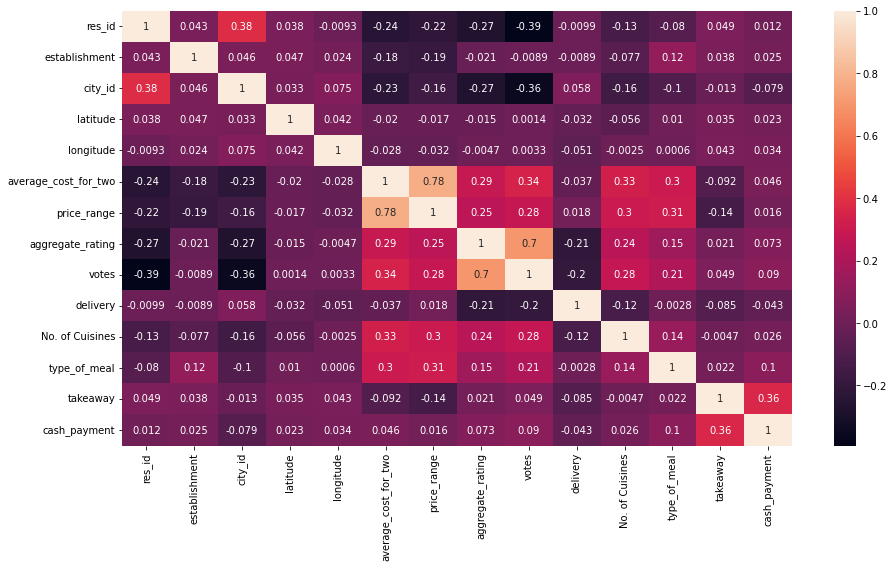

In [7]:
corr = df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True);

In [9]:
columns=['average_cost_for_two','price_range','votes','No. of Cuisines','type_of_meal']

In [10]:
X=df[columns].values
y=df['aggregate_rating'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)

(44454, 5)


### Rating Prediction using Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [14]:
reg.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=reg.predict(X_test)

In [16]:
from sklearn.metrics import r2_score

In [17]:
r2_score(y_test,y_pred)

0.15192470971168792

### Rating Prediction using Decision Tree

In [18]:
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [19]:
y_pred2 = regressor.predict(X_test)

In [20]:
r2_score(y_test,y_pred2)

0.8471740590668804

### Rating Prediction using Radom Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(X_train,y_train)
y_predict5=RForest.predict(X_test)
r2_score(y_test,y_predict5)

0.8937885887995097

### Rating Prediction using Extra Tree

In [22]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,y_train)
y_predict4=ETree.predict(X_test)
r2_score(y_test,y_predict4)

0.8709824971727094

#### The best prediction for rating was given by the algorithm `Random Forest` with the r2-score value of 0.89 or 89% 

## Average_cost_for_two prediction using Linear Regression

In [23]:
cuisines=df.groupby('establishment').mean()['average_cost_for_two'].reset_index()
cuisines

,establishment,average_cost_for_two
0,0,301.206629
1,1,1314.135096
2,2,226.204918
3,3,237.436709
4,4,375.000000
5,5,560.116420
6,6,768.470660
7,7,2011.607143
8,8,2037.500000
9,9,270.596330


In [24]:
df=df.merge(cuisines,on='establishment')

In [25]:
df.rename(columns={'average_cost_for_two_y':'Cuisines'},inplace=True)

In [26]:
df.corr()['average_cost_for_two_x']

res_id                   -0.201816
establishment            -0.186967
city_id                  -0.200593
latitude                 -0.002535
longitude                -0.010254
average_cost_for_two_x    1.000000
price_range               0.791333
aggregate_rating          0.250045
votes                     0.263603
delivery                  0.054135
No. of Cuisines           0.251439
type_of_meal              0.276341
takeaway                 -0.243833
cash_payment              0.023012
Cuisines                  0.711864
Name: average_cost_for_two_x, dtype: float64

In [27]:
columns=['price_range','No. of Cuisines','Cuisines','aggregate_rating','votes']

In [28]:
X=df[columns].values
y=df['average_cost_for_two_x'].values

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape)

(38897, 5)


In [30]:
reg1=LinearRegression()

In [31]:
reg1.fit(X_train,y_train)

LinearRegression()

In [32]:
y_predict_cost=reg1.predict(X_test)

In [33]:
r2_score(y_test,y_predict_cost)

0.6471499173863282

## Average_cost_for_two prediction using Decision Tree

In [34]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [35]:
y_predict_cost2=regressor.predict(X_test)

In [36]:
r2_score(y_test,y_predict_cost2)

0.5314626315091339

## Average_cost_for_two prediction using Random Forest

In [37]:
RForest.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=0.0001, n_estimators=500,
                      random_state=329)

In [38]:
y_predict_cost4=RForest.predict(X_test)

In [39]:
r2_score(y_test,y_predict_cost4)

0.7158772381253109

## Average_cost_for_two prediction using Extra Tree

In [40]:
ETree.fit(X_train,y_train)

ExtraTreesRegressor()

In [41]:
y_predict_cost3=ETree.predict(X_test)

In [42]:
r2_score(y_test,y_predict_cost3)

0.6634495084062187

The best prediction for cost is also done by Random Forest providing the r2-score=0.71 or 71%